<a href="https://colab.research.google.com/github/igorzeck/AnaliseRESTDoPix/blob/main/0_Projeto_estast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install.packages("GetBCBData") - dados do BCB;

install.packages("ipeadatar") - dados do IPEA;

library(yfR) - para séries temporais.

library("ucimlrepo")

str funciona como o método .info do python, ou seja, para uma coleção de dados, é dado a estrutura que essa coleção tem.

nrow te dá o número de linhas de uma coleção de dados e ncol o número de colunas.

In [ ]:
install.packages("readr")
install.packages("remotes")
install.packages("MASS")
install.packages("knitr")
install.packages("kableExtra")
install.packages("styler")
install.packages("reticulate")
install.packages("DescTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘R.cache’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’




In [ ]:
library("readr")
library("remotes")
library("MASS")
library("knitr")
library("kableExtra")
library("styler")
library("reticulate")
library("DescTools")

In [ ]:
df <- read_csv("/content/dados_pix.csv")

Rows: 546310 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): PAG_PFPJ, REC_PFPJ, PAG_REGIAO, REC_REGIAO, PAG_IDADE, REC_IDADE, F...
dbl (2): AnoMes, QUANTIDADE
num (1): VALOR

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
df <- as.data.frame(lapply(df,tolower))

In [ ]:
df$PAG_REGIAO <- ifelse(df$PAG_REGIAO == "nao informado",NA,df$PAG_REGIAO)
df$REC_REGIAO <- ifelse(df$REC_REGIAO == "nao informado",NA,df$REC_REGIAO)
df$FORMAINICIACAO <- ifelse(df$FORMAINICIACAO == "nao disponivel",NA,df$FORMAINICIACAO)
df$FINALIDADE <- ifelse(df$FINALIDADE == "nao disponivel",NA,df$FINALIDADE)
df$PAG_IDADE <- ifelse(df$PAG_IDADE == "nao informado",NA,df$PAG_IDADE)
df$PAG_IDADE <- ifelse(df$PAG_IDADE == "nao se aplica",NA,df$PAG_IDADE)
df$REC_IDADE <- ifelse(df$REC_IDADE == "nao informado",NA,df$REC_IDADE)
df$REC_IDADE <- ifelse(df$REC_IDADE == "nao se aplica",NA,df$REC_IDADE)

In [ ]:
names(df) <- gsub("_","",names(df))
names(df) <- lapply(names(df),tolower)

In [ ]:
str(df)
head(df,5)
tail(df,5)

'data.frame':	546310 obs. of  12 variables:
 $ anomes        : chr  "202211" "202303" "202301" "202401" ...
 $ pagpfpj       : chr  "pf" "pf" "pj" "pj" ...
 $ recpfpj       : chr  "pf" "pj" "pf" "pj" ...
 $ pagregiao     : chr  "norte" "norte" "sudeste" "sul" ...
 $ recregiao     : chr  "nordeste" "norte" NA "nordeste" ...
 $ pagidade      : chr  "entre 20 e 29 anos" "mais de 60 anos" NA NA ...
 $ recidade      : chr  "entre 20 e 29 anos" NA "entre 30 e 39 anos" NA ...
 $ formainiciacao: chr  "manu" "qrdn" NA "manu" ...
 $ natureza      : chr  "p2p" "p2b" "b2p" "b2g" ...
 $ finalidade    : chr  "pix" "pix troco" NA "pix" ...
 $ valor         : chr  "762692967" "752559" "25542433" "66831598" ...
 $ quantidade    : chr  "66474" "16" "1194" "77" ...


anomes pagpfpj recpfpj pagregiao recregiao pagidade          
1 202211 pf      pf      norte     nordeste  entre 20 e 29 anos
2 202303 pf      pj      norte     norte     mais de 60 anos   
3 202301 pj      pf      sudeste   NA        NA                
4 202401 pj      pj      sul       nordeste  NA                
5 202408 pf      pf      nordeste  sul       entre 50 e 59 anos
  recidade           formainiciacao natureza finalidade valor     quantidade
1 entre 20 e 29 anos manu           p2p      pix        762692967 66474     
2 NA                 qrdn           p2b      pix troco  752559    16        
3 entre 30 e 39 anos NA             b2p      NA         25542433  1194      
4 NA                 manu           b2g      pix        66831598  77        
5 entre 20 e 29 anos manu           p2p      pix        122611251 8636

anomes pagpfpj recpfpj pagregiao    recregiao pagidade          
546306 202208 pf      pf      sul          norte     até 19 anos       
546307 202107 pf      pf      sudeste      norte     mais de 60 anos   
546308 202406 pf      pf      nordeste     sudeste   mais de 60 anos   
546309 202502 pf      pf      centro-oeste NA        entre 20 e 29 anos
546310 202310 pf      pf      centro-oeste nordeste  entre 50 e 59 anos
       recidade           formainiciacao natureza finalidade valor   
546306 mais de 60 anos    dict           p2p      pix        7512955 
546307 entre 50 e 59 anos qrdn           p2p      pix        205     
546308 entre 40 e 49 anos qrdn           p2p      pix        38470777
546309 entre 50 e 59 anos NA             p2p      NA         5151    
546310 entre 50 e 59 anos qrdn           p2p      pix        8650575 
       quantidade
546306 788       
546307 2         
546308 9327      
546309 6         
546310 2124

In [ ]:
df$pagpfpj <- as.factor(df$pagpfpj)
df$recpfpj <- as.factor(df$recpfpj)
df$pagregiao <- as.factor(df$pagregiao)
df$recregiao <- as.factor(df$recregiao)
df$pagidade <- as.factor(df$pagidade)
df$recidade <- as.factor(df$recidade)
df$formainiciacao <- as.factor(df$formainiciacao)
df$natureza <- as.factor(df$natureza)
df$finalidade <- as.factor(df$finalidade)

In [ ]:
aux = df$pagidade[df$pagidade=='entre 50 e 59 anos']
aux

[1] <NA>               <NA>               entre 50 e 59 anos
    [4] entre 50 e 59 anos entre 50 e 59 anos entre 50 e 59 anos
    [7] <NA>               entre 50 e 59 anos entre 50 e 59 anos
   [10] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [13] <NA>               entre 50 e 59 anos <NA>              
   [16] <NA>               <NA>               <NA>              
   [19] <NA>               <NA>               <NA>              
   [22] <NA>               entre 50 e 59 anos entre 50 e 59 anos
   [25] <NA>               <NA>               <NA>              
   [28] <NA>               entre 50 e 59 anos entre 50 e 59 anos
   [31] entre 50 e 59 anos entre 50 e 59 anos entre 50 e 59 anos
   [34] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [37] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [40] <NA>               <NA>               <NA>              
   [43] <NA>               <NA>               <NA>              
   [46] entre 50 e 59 anos <NA>               entre 50 e 59 anos
   [49] entre 50 e 59 anos entre 50 e 59 anos entre 50 e 59 anos
   [52] <NA>               <NA>               entre 50 e 59 anos
   [55] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [58] <NA>               entre 50 e 59 anos <NA>              
   [61] entre 50 e 59 anos <NA>               <NA>              
   [64] <NA>               <NA>               <NA>              
   [67] <NA>               entre 50 e 59 anos <NA>              
   [70] entre 50 e 59 anos <NA>               <NA>              
   [73] <NA>               entre 50 e 59 anos <NA>              
   [76] <NA>               <NA>               entre 50 e 59 anos
   [79] <NA>               <NA>               entre 50 e 59 anos
   [82] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [85] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [88] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [91] entre 50 e 59 anos <NA>               entre 50 e 59 anos
   [94] <NA>               <NA>               entre 50 e 59 anos
   [97] <NA>               <NA>               <NA>              
  [100] <NA>               entre 50 e 59 anos <NA>              
  [103] <NA>               entre 50 e 59 anos <NA>              
  [106] entre 50 e 59 anos <NA>               entre 50 e 59 anos
  [109] <NA>               <NA>               <NA>              
  [112] <NA>               <NA>               <NA>              
  [115] <NA>               entre 50 e 59 anos entre 50 e 59 anos
  [118] <NA>               <NA>               entre 50 e 59 anos
  [121] <NA>               <NA>               <NA>              
  [124] <NA>               entre 50 e 59 anos <NA>              
  [127] <NA>               entre 50 e 59 anos entre 50 e 59 anos
  [130] entre 50 e 59 anos entre 50 e 59 anos <NA>              
  [133] <NA>               <NA>               <NA>              
  [136] <NA>               entre 50 e 59 anos <NA>              
  [139] entre 50 e 59 anos <NA>               <NA>              
  [142] entre 50 e 59 anos <NA>               <NA>              
  [145] <NA>               <NA>               entre 50 e 59 anos
  [148] <NA>               entre 50 e 59 anos <NA>              
  [151] <NA>               entre 50 e 59 anos <NA>              
  [154] entre 50 e 59 anos <NA>               entre 50 e 59 anos
  [157] entre 50 e 59 anos <NA>               <NA>              
  [160] <NA>               <NA>               entre 50 e 59 anos
  [163] <NA>               entre 50 e 59 anos <NA>              
  [166] entre 50 e 59 anos <NA>               <NA>              
  [169] entre 50 e 59 anos <NA>               entre 50 e 59 anos
  [172] entre 50 e 59 anos entre 50 e 59 anos <NA>              
  [175] <NA>               <NA>               <NA>              
  [178] <NA>               <NA>               entre 50 e 59 anos
  [181] <NA>               entre 50 e 59 anos entre 50 e 59 anos
  [184] <NA>               entre 50 e 5

In [ ]:
levels(df$pagidade)
levels(df$recidade)

[1] "até 19 anos"        "entre 20 e 29 anos" "entre 30 e 39 anos"
[4] "entre 40 e 49 anos" "entre 50 e 59 anos" "mais de 60 anos"

[1] "até 19 anos"        "entre 20 e 29 anos" "entre 30 e 39 anos"
[4] "entre 40 e 49 anos" "entre 50 e 59 anos" "mais de 60 anos"

In [ ]:
ms <- c("até 19 anos","entre 20 e 29 anos","entre 30 e 39 anos","entre 40 e 49 anos","entre 50 e 59 anos","mais de 60 anos")
df$pagidade <- factor(df$pagidade, levels = ms, ordered = TRUE)
df$recidade <- factor(df$recidade, levels = ms, ordered = TRUE)

In [ ]:
summary(df$pagidade)

até 19 anos entre 20 e 29 anos entre 30 e 39 anos entre 40 e 49 anos 
             66940              76285              76743              75810 
entre 50 e 59 anos    mais de 60 anos               NA's 
             73183              70502             106847

In [ ]:
df$valor <- as.numeric(df$valor)
df$quantidade <- as.integer(df$quantidade)

In [ ]:
summary(df$quantidade)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        1        36       800    292752     14132 207552841 

In [ ]:
mean(df$quantidade, na.rm = TRUE)
median(df$quantidade, na.rm=TRUE)
sd(df$quantidade, na.rm=TRUE)
var(df$quantidade, na.rm=TRUE)

vetor_sem_na <- na.omit(df$quantidade)
valores_unicos <- unique(vetor_sem_na)
frequencia <- tabulate(match(vetor_sem_na, valores_unicos))
moda_index <- which.max(frequencia)
moda_index

[1] 292752.4

[1] 800

[1] 2598653

[1] 6.752996e+12

[1] 27

In [ ]:
x <- df$quantidade
n_i <- table(cut(x, breaks = seq(floor(min(x)),ceiling(max(x)),length.out = 5),right=TRUE))
n_i
nome_var <- sub(".*\\$","",deparse(substitute(x)))
f_i <- prop.table(n_i)
f_i
p_i <- 100*f_i
n_i <- c(n_i,sum(n_i))
f_i <- c(f_i,sum(f_i))
p_i <- c(p_i,sum(p_i))
names(n_i)[length(n_i)] <- "Total"
tab <- cbind(Valores = names(n_i),n_i,f_i = round(f_i,3),p_i = round(p_i,3))
rownames(tab) <- NULL
tab <- as.data.frame(tab)
colnames(tab) <- c("valor","n_i","f_i","p_i")
tab[,2] <- as.integer(tab[,2])
tab[,2]
tab


       (1,5.19e+07] (5.19e+07,1.04e+08] (1.04e+08,1.56e+08] (1.56e+08,2.08e+08] 
             519918                 244                  38                  12 


       (1,5.19e+07] (5.19e+07,1.04e+08] (1.04e+08,1.56e+08] (1.56e+08,2.08e+08] 
       9.994348e-01        4.690395e-04        7.304714e-05        2.306752e-05 

[1] 519918    244     38     12 520212

valor               n_i    f_i   p_i   
1 (1,5.19e+07]        519918 0.999 99.943
2 (5.19e+07,1.04e+08]    244 0     0.047 
3 (1.04e+08,1.56e+08]     38 0     0.007 
4 (1.56e+08,2.08e+08]     12 0     0.002 
5 Total               520212 1     100

In [ ]:
head(df,10)

anomes pagpfpj recpfpj pagregiao    recregiao pagidade          
1  202211 pf      pf      norte        nordeste  entre 20 e 29 anos
2  202303 pf      pj      norte        norte     mais de 60 anos   
3  202301 pj      pf      sudeste      NA        NA                
4  202401 pj      pj      sul          nordeste  NA                
5  202408 pf      pf      nordeste     sul       entre 50 e 59 anos
6  202307 pf      pf      norte        NA        entre 50 e 59 anos
7  202210 pf      pf      sul          sudeste   entre 50 e 59 anos
8  202211 pf      pf      centro-oeste norte     entre 50 e 59 anos
9  202211 pj      pj      centro-oeste sudeste   NA                
10 202210 pf      pj      norte        norte     mais de 60 anos   
   recidade           formainiciacao natureza finalidade valor      quantidade
1  entre 20 e 29 anos manu           p2p      pix         762692967 66474     
2  NA                 qrdn           p2b      pix troco      752559    16     
3  entre 30 e 39 anos NA             b2p      NA           25542433  1194     
4  NA                 manu           b2g      pix          66831598    77     
5  entre 20 e 29 anos manu           p2p      pix         122611251  8636     
6  entre 40 e 49 anos qres           p2p      pix           2384856   136     
7  entre 30 e 39 anos qrdn           p2p      pix           5893401   910     
8  entre 30 e 39 anos dict           p2p      pix        2437151536 64311     
9  NA                 manu           b2g      pix           7086933    14     
10 NA                 manu           p2b      pix        3760685896 53690

In [ ]:
aux = df$pagidade[df$pagidade=='entre 50 e 59 anos']
aux

[1] <NA>               <NA>               entre 50 e 59 anos
    [4] entre 50 e 59 anos entre 50 e 59 anos entre 50 e 59 anos
    [7] <NA>               entre 50 e 59 anos entre 50 e 59 anos
   [10] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [13] <NA>               entre 50 e 59 anos <NA>              
   [16] <NA>               <NA>               <NA>              
   [19] <NA>               <NA>               <NA>              
   [22] <NA>               entre 50 e 59 anos entre 50 e 59 anos
   [25] <NA>               <NA>               <NA>              
   [28] <NA>               entre 50 e 59 anos entre 50 e 59 anos
   [31] entre 50 e 59 anos entre 50 e 59 anos entre 50 e 59 anos
   [34] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [37] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [40] <NA>               <NA>               <NA>              
   [43] <NA>               <NA>               <NA>              
   [46] entre 50 e 59 anos <NA>               entre 50 e 59 anos
   [49] entre 50 e 59 anos entre 50 e 59 anos entre 50 e 59 anos
   [52] <NA>               <NA>               entre 50 e 59 anos
   [55] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [58] <NA>               entre 50 e 59 anos <NA>              
   [61] entre 50 e 59 anos <NA>               <NA>              
   [64] <NA>               <NA>               <NA>              
   [67] <NA>               entre 50 e 59 anos <NA>              
   [70] entre 50 e 59 anos <NA>               <NA>              
   [73] <NA>               entre 50 e 59 anos <NA>              
   [76] <NA>               <NA>               entre 50 e 59 anos
   [79] <NA>               <NA>               entre 50 e 59 anos
   [82] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [85] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [88] entre 50 e 59 anos entre 50 e 59 anos <NA>              
   [91] entre 50 e 59 anos <NA>               entre 50 e 59 anos
   [94] <NA>               <NA>               entre 50 e 59 anos
   [97] <NA>               <NA>               <NA>              
  [100] <NA>               entre 50 e 59 anos <NA>              
  [103] <NA>               entre 50 e 59 anos <NA>              
  [106] entre 50 e 59 anos <NA>               entre 50 e 59 anos
  [109] <NA>               <NA>               <NA>              
  [112] <NA>               <NA>               <NA>              
  [115] <NA>               entre 50 e 59 anos entre 50 e 59 anos
  [118] <NA>               <NA>               entre 50 e 59 anos
  [121] <NA>               <NA>               <NA>              
  [124] <NA>               entre 50 e 59 anos <NA>              
  [127] <NA>               entre 50 e 59 anos entre 50 e 59 anos
  [130] entre 50 e 59 anos entre 50 e 59 anos <NA>              
  [133] <NA>               <NA>               <NA>              
  [136] <NA>               entre 50 e 59 anos <NA>              
  [139] entre 50 e 59 anos <NA>               <NA>              
  [142] entre 50 e 59 anos <NA>               <NA>              
  [145] <NA>               <NA>               entre 50 e 59 anos
  [148] <NA>               entre 50 e 59 anos <NA>              
  [151] <NA>               entre 50 e 59 anos <NA>              
  [154] entre 50 e 59 anos <NA>               entre 50 e 59 anos
  [157] entre 50 e 59 anos <NA>               <NA>              
  [160] <NA>               <NA>               entre 50 e 59 anos
  [163] <NA>               entre 50 e 59 anos <NA>              
  [166] entre 50 e 59 anos <NA>               <NA>              
  [169] entre 50 e 59 anos <NA>               entre 50 e 59 anos
  [172] entre 50 e 59 anos entre 50 e 59 anos <NA>              
  [175] <NA>               <NA>               <NA>              
  [178] <NA>               <NA>               entre 50 e 59 anos
  [181] <NA>               entre 50 e 59 anos entre 50 e 59 anos
  [184] <NA>               entre 50 e 5

In [ ]:
aux_1 <- c("CO","NE","N","SE","S")
levels(df$pagregiao) <- aux_1
levels(df$recregiao) <- aux_1

In [ ]:
aux_2 <- c("[19]","[20,29]","[30,39]","[40,49]","[50,59]","[60)")
levels(df$pagidade) <- aux_2
levels(df$recidade) <- aux_2

In [ ]:
aux = df$pagidade[(df$pagidade=="[50,59]")]
aux

[1] <NA>    <NA>    [50,59] [50,59] [50,59] [50,59] <NA>    [50,59] [50,59]
   [10] [50,59] [50,59] <NA>    <NA>    [50,59] <NA>    <NA>    <NA>    <NA>   
   [19] <NA>    <NA>    <NA>    <NA>    [50,59] [50,59] <NA>    <NA>    <NA>   
   [28] <NA>    [50,59] [50,59] [50,59] [50,59] [50,59] [50,59] [50,59] <NA>   
   [37] [50,59] [50,59] <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
   [46] [50,59] <NA>    [50,59] [50,59] [50,59] [50,59] <NA>    <NA>    [50,59]
   [55] [50,59] [50,59] <NA>    <NA>    [50,59] <NA>    [50,59] <NA>    <NA>   
   [64] <NA>    <NA>    <NA>    <NA>    [50,59] <NA>    [50,59] <NA>    <NA>   
   [73] <NA>    [50,59] <NA>    <NA>    <NA>    [50,59] <NA>    <NA>    [50,59]
   [82] [50,59] [50,59] <NA>    [50,59] [50,59] <NA>    [50,59] [50,59] <NA>   
   [91] [50,59] <NA>    [50,59] <NA>    <NA>    [50,59] <NA>    <NA>    <NA>   
  [100] <NA>    [50,59] <NA>    <NA>    [50,59] <NA>    [50,59] <NA>    [50,59]
  [109] <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    [50,59] [50,59]
  [118] <NA>    <NA>    [50,59] <NA>    <NA>    <NA>    <NA>    [50,59] <NA>   
  [127] <NA>    [50,59] [50,59] [50,59] [50,59] <NA>    <NA>    <NA>    <NA>   
  [136] <NA>    [50,59] <NA>    [50,59] <NA>    <NA>    [50,59] <NA>    <NA>   
  [145] <NA>    <NA>    [50,59] <NA>    [50,59] <NA>    <NA>    [50,59] <NA>   
  [154] [50,59] <NA>    [50,59] [50,59] <NA>    <NA>    <NA>    <NA>    [50,59]
  [163] <NA>    [50,59] <NA>    [50,59] <NA>    <NA>    [50,59] <NA>    [50,59]
  [172] [50,59] [50,59] <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    [50,59]
  [181] <NA>    [50,59] [50,59] <NA>    [50,59] <NA>    [50,59] <NA>    [50,59]
  [190] [50,59] <NA>    [50,59] [50,59] [50,59] <NA>    [50,59] [50,59] <NA>   
  [199] <NA>    [50,59] [50,59] <NA>    <NA>    [50,59] <NA>    <NA>    [50,59]
  [208] [50,59] [50,59] [50,59] <NA>    <NA>    [50,59] [50,59] <NA>    [50,59]
  [217] [50,59] <NA>    [50,59] <NA>    [50,59] <NA>    <NA>    [50,59] <NA>   
  [226] [50,59] <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
  [235] <NA>    [50,59] <NA>    <NA>    <NA>    [50,59] <NA>    <NA>    [50,59]
  [244] <NA>    [50,59] <NA>    <NA>    <NA>    <NA>    [50,59] <NA>    <NA>   
  [253] <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    [50,59] <NA>    <NA>   
  [262] <NA>    <NA>    [50,59] <NA>    [50,59] <NA>    <NA>    <NA>    [50,59]
  [271] [50,59] <NA>    <NA>    <NA>    <NA>    [50,59] <NA>    [50,59] [50,59]
  [280] <NA>    <NA>    <NA>    [50,59] <NA>    <NA>    [50,59] [50,59] <NA>   
  [289] <NA>    <NA>    <NA>    <NA>    [50,59] <NA>    <NA>    <NA>    <NA>   
  [298] <NA>    [50,59] <NA>    <NA>    [50,59] [50,59] <NA>    [50,59] <NA>   
  [307] <NA>    <NA>    [50,59] <NA>    <NA>    [50,59] [50,59] [50,59] [50,59]
  [316] [50,59] [50,59] [50,59] <NA>    [50,59] [50,59] [50,59] [50,59] [50,59]
  [325] <NA>    [50,59] <NA>    <NA>    <NA>    <NA>    <NA>    [50,59] <NA>   
  [334] <NA>    [50,59] <NA>    <NA>    [50,59] [50,59] [50,59] <NA>    <NA>   
  [343] <NA>    <NA>    [50,59] <NA>    <NA>    <NA>    [50,59] <NA>    [50,59]
  [352] <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    [50,59] <NA>   
  [361] <NA>    [50,59] <NA>    [50,59] [50,59] [50,59] <NA>    <NA>    <NA>   
  [370] <NA>    [50,59] <NA>    <NA>    [50,59] <NA>    <NA>    [50,59] [50,59]
  [379] <NA>    <NA>    <NA>    <NA>    [50,59] [50,59] <NA>    [50,59] <NA>   
  [388] <NA>    [50,59] [50,59] [50,59] <NA>    [50,59] <NA>    [50,59] <NA>   
  [397] <NA>    <NA>    <NA>    [50,59] <NA>    <NA>    [50,59] [50,59] <NA>   
  [406] [50,59] [50,59] <NA>    <NA>    [50,59] <NA>    [50,59] <NA>    <NA>   
  [415] <NA>    <NA>    <NA>    <NA>    <NA>    [50,59] [50,59] <NA>    <NA>   
  [424] <NA>    <NA>    [50,59] <NA>    [50,59] <NA>    <NA>    <NA>    <NA>   
  [433] <NA>    <NA>    [50,59] [50,59] <NA>    <NA>    [50,59] <NA>    <NA>   
  [442] <NA>    [50,59] <NA>    [50,59] [50,59] <NA>    [50,59] [50,59] [50,59]
  [4

In [ ]:
head(df,5)
tail(df,5)

anomes pagpfpj recpfpj pagregiao recregiao pagidade recidade formainiciacao
1 202211 pf      pf      N         NE        [20,29]  [20,29]  manu          
2 202303 pf      pj      N         N         [60)     NA       qrdn          
3 202301 pj      pf      SE        NA        NA       [30,39]  NA            
4 202401 pj      pj      S         NE        NA       NA       manu          
5 202408 pf      pf      NE        S         [50,59]  [20,29]  manu          
  natureza finalidade valor     quantidade
1 p2p      pix        762692967 66474     
2 p2b      pix troco     752559    16     
3 b2p      NA          25542433  1194     
4 b2g      pix         66831598    77     
5 p2p      pix        122611251  8636

anomes pagpfpj recpfpj pagregiao recregiao pagidade recidade
546306 202208 pf      pf      S         N         [19]     [60)    
546307 202107 pf      pf      SE        N         [60)     [50,59] 
546308 202406 pf      pf      NE        SE        [60)     [40,49] 
546309 202502 pf      pf      CO        NA        [20,29]  [50,59] 
546310 202310 pf      pf      CO        NE        [50,59]  [50,59] 
       formainiciacao natureza finalidade valor    quantidade
546306 dict           p2p      pix         7512955  788      
546307 qrdn           p2p      pix             205    2      
546308 qrdn           p2p      pix        38470777 9327      
546309 NA             p2p      NA             5151    6      
546310 qrdn           p2p      pix         8650575 2124

In [ ]:
ms <- c('[19]','[20,29]','[30,39]','[40,49]','[50,59]','[60)')
df$pagidade <- factor(df$pagidade, levels = ms, ordered = TRUE)
df$recidade <- factor(df$recidade, levels = ms, ordered = TRUE)
df$pagidade[5] > df$recidade[5]

[1] TRUE

In [ ]:
df$anomes <- as.factor(df$anomes)
levels(df$anomes)

[1] "202011" "202012" "202101" "202102" "202103" "202104" "202105" "202106"
 [9] "202107" "202108" "202109" "202110" "202111" "202112" "202201" "202202"
[17] "202203" "202204" "202205" "202206" "202207" "202208" "202209" "202210"
[25] "202211" "202212" "202301" "202302" "202303" "202304" "202305" "202306"
[33] "202307" "202308" "202309" "202310" "202311" "202312" "202401" "202402"
[41] "202403" "202404" "202405" "202406" "202407" "202408" "202409" "202410"
[49] "202411" "202412" "202501" "202502" "202503" "202504" "202505" "202506"
[57] "202507"

In [ ]:
ms <- c('202011','202012','202101','202102','202103','202104','202105','202106','202107','202108','202109','202110','202111','202112','202201','202202','202203','202204','202205','202206','202207','202208','202209','202210','202211','202212','202301','202302','202303','202304','202305','202306','202307','202308','202309','202310','202311','202312','202401','202402','202403','202404','202405','202406','202407','202408','202409','202410','202411','202412','202501','202502','202503','202504','202505','202506','202507')
df$anomes <- factor(df$anomes, levels = ms, ordered = TRUE)
df$anomes[546309] > df$anomes[546310]

[1] TRUE

#Box-plot

The following objects are masked from df (pos = 4):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 5):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 6):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 7):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 8):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 9):

    anomes, 

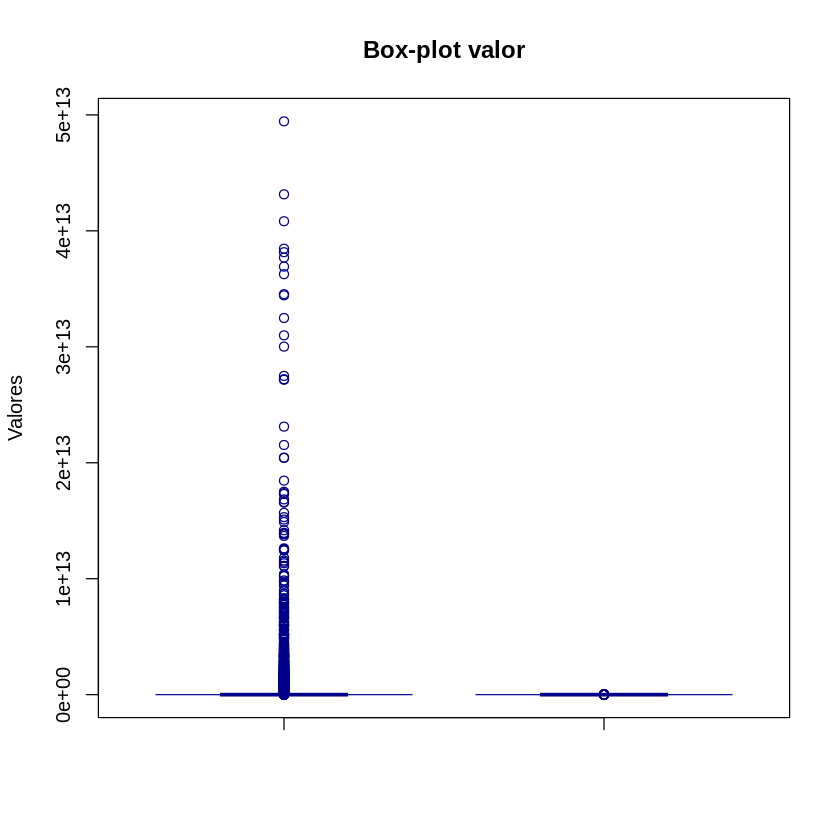

In [ ]:
attach(df)
set.seed(123)
dados_1 <- valor
dados_2 <- quantidade
boxplot(dados_1, dados_2,
        main="Box-plot valor",
        ylab="Valores",
        col="lightblue",
        border="darkblue",
        notch = T)

#Tabelas de contigência:

##Por colunas

In [ ]:
attach(df)
tab_1 <- table(pagpfpj,pagregiao)
tab_freq_abs <- rbind(cbind(tab_1,margin.table(tab_1,1)),
                      c(margin.table(tab_1,2),
                      sum(margin.table(tab_1,1))))
dimnames(tab_freq_abs)[[1]][4] <- "Total_linha"
dimnames(tab_freq_abs)[[1]][4] <- "Total_coluna"
kable(tab_freq_abs)

The following objects are masked from df (pos = 3):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 5):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 6):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 7):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 8):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 9):

    anomes, 



|               |    CO|    NE|     N|    SE|     S|       |
|:--------------|-----:|-----:|-----:|-----:|-----:|------:|
|nao disponivel |     0|     0|     0|     0|     0|      0|
|pf             | 75001| 78785| 75719| 79671| 74298| 383474|
|pj             | 17561| 17747| 16076| 19091| 17478|  87953|
|Total_coluna   | 92562| 96532| 91795| 98762| 91776| 471427|

In [ ]:
attach(df)
tab_2 <- 100*round(prop.table(tab_1),3)
tab_freq_rel <- rbind(cbind(tab_2,margin.table(tab_2,1)),
                      c(margin.table(tab_2,2),
                      sum(margin.table(tab_2,1))))
dimnames(tab_freq_rel)[[1]][4] <- "Total_linha"
dimnames(tab_freq_rel)[[1]][4] <- "Total coluna"
kable(tab_freq_rel)

The following objects are masked from df (pos = 3):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 4):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 6):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 7):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 8):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 9):

    anomes, 



|               |   CO|   NE|    N|   SE|    S|      |
|:--------------|----:|----:|----:|----:|----:|-----:|
|nao disponivel |  0.0|  0.0|  0.0|  0.0|  0.0|   0.0|
|pf             | 15.9| 16.7| 16.1| 16.9| 15.8|  81.4|
|pj             |  3.7|  3.8|  3.4|  4.0|  3.7|  18.6|
|Total coluna   | 19.6| 20.5| 19.5| 20.9| 19.5| 100.0|

In [ ]:
attach(df)
tab_2 <- 100*round(prop.table(tab_1,2),3)
tab_freq_rel <- rbind(cbind(tab_2,round(100*margin.table(tab_2,1)/sum(margin.table(tab_2,1)),3)),
                      c(margin.table(tab_2,2),
                      sum(margin.table(tab_2,1)/sum(margin.table(tab_2,1)))))
dimnames(tab_freq_rel)[[1]][4] <- "Total_linha"
dimnames(tab_freq_rel)[[1]][4] <- "Total_coluna"
kable(tab_freq_rel)

The following objects are masked from df (pos = 3):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 4):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 5):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 7):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 8):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 9):

    anomes, 



|               |  CO|    NE|     N|    SE|   S|      |
|:--------------|---:|-----:|-----:|-----:|---:|-----:|
|nao disponivel |   0|   0.0|   0.0|   0.0|   0|  0.00|
|pf             |  81|  81.6|  82.5|  80.7|  81| 81.36|
|pj             |  19|  18.4|  17.5|  19.3|  19| 18.64|
|Total_coluna   | 100| 100.0| 100.0| 100.0| 100|  1.00|

##Por colunas

In [ ]:
attach(df)
tab_1 <- table(pagregiao,pagpfpj)
tab_freq_abs <- rbind(cbind(tab_1,margin.table(tab_1,1)),
                      c(margin.table(tab_1,2),
                      sum(margin.table(tab_1,1))))
dimnames(tab_freq_abs)[[2]][4] <- "Total_linha"
dimnames(tab_freq_abs)[[2]][4] <- "Total_coluna"
kable(tab_freq_abs)

The following objects are masked from df (pos = 3):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 4):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 5):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 6):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 8):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 9):

    anomes, 



|   | nao disponivel|     pf|    pj| Total_coluna|
|:--|--------------:|------:|-----:|------------:|
|CO |              0|  75001| 17561|        92562|
|NE |              0|  78785| 17747|        96532|
|N  |              0|  75719| 16076|        91795|
|SE |              0|  79671| 19091|        98762|
|S  |              0|  74298| 17478|        91776|
|   |              0| 383474| 87953|       471427|

In [ ]:
attach(df)
tab_2 <- 100*round(prop.table(tab_1),3)
tab_freq_rel <- rbind(cbind(tab_2,margin.table(tab_2,1)),
                      c(margin.table(tab_2,2),
                      sum(margin.table(tab_2,1))))
dimnames(tab_freq_rel)[[2]][4] <- "Total_linha"
dimnames(tab_freq_rel)[[2]][4] <- "Total coluna"
kable(tab_freq_rel)

The following objects are masked from df (pos = 3):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 4):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 5):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 6):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 7):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 9):

    anomes, 



|   | nao disponivel|   pf|   pj| Total coluna|
|:--|--------------:|----:|----:|------------:|
|CO |              0| 15.9|  3.7|         19.6|
|NE |              0| 16.7|  3.8|         20.5|
|N  |              0| 16.1|  3.4|         19.5|
|SE |              0| 16.9|  4.0|         20.9|
|S  |              0| 15.8|  3.7|         19.5|
|   |              0| 81.4| 18.6|        100.0|

In [ ]:
attach(df)
tab_2 <- 100*round(prop.table(tab_1,2),3)
tab_freq_rel <- rbind(cbind(tab_2,round(100*margin.table(tab_2,1)/sum(margin.table(tab_2,1)),3)),
                      c(margin.table(tab_2,2),
                      sum(margin.table(tab_2,1)/sum(margin.table(tab_2,1)))))
dimnames(tab_freq_rel)[[2]][4] <- "Total_linha"
dimnames(tab_freq_rel)[[2]][4] <- "Total_coluna"
kable(tab_freq_rel)

The following objects are masked from df (pos = 3):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 4):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 5):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 6):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 7):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 8):

    anomes, 



|   | nao disponivel|    pf|    pj| Total_coluna|
|:--|--------------:|-----:|-----:|------------:|
|CO |            NaN|  19.6|  20.0|          NaN|
|NE |            NaN|  20.5|  20.2|          NaN|
|N  |            NaN|  19.7|  18.3|          NaN|
|SE |            NaN|  20.8|  21.7|          NaN|
|S  |            NaN|  19.4|  19.9|          NaN|
|   |            NaN| 100.0| 100.1|          NaN|

#Índice de contigência

In [ ]:
attach(df)
df_na <- na.exclude(df)
chisq.test(df_na$pagregiao, df_na$pagidade)

The following objects are masked from df (pos = 3):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 4):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 5):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 6):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 7):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 8):

    anomes, 


	Pearson's Chi-squared test

data:  df_na$pagregiao and df_na$pagidade
X-squared = 2.0759, df = 20, p-value = 1


#Gráfico de correlação

The following objects are masked from df (pos = 3):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 4):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 5):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 6):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 7):

    anomes, finalidade, formainiciacao, natureza, pagidade, pagpfpj,
    pagregiao, quantidade, recidade, recpfpj, recregiao, valor


The following objects are masked from df (pos = 8):

    anomes, 

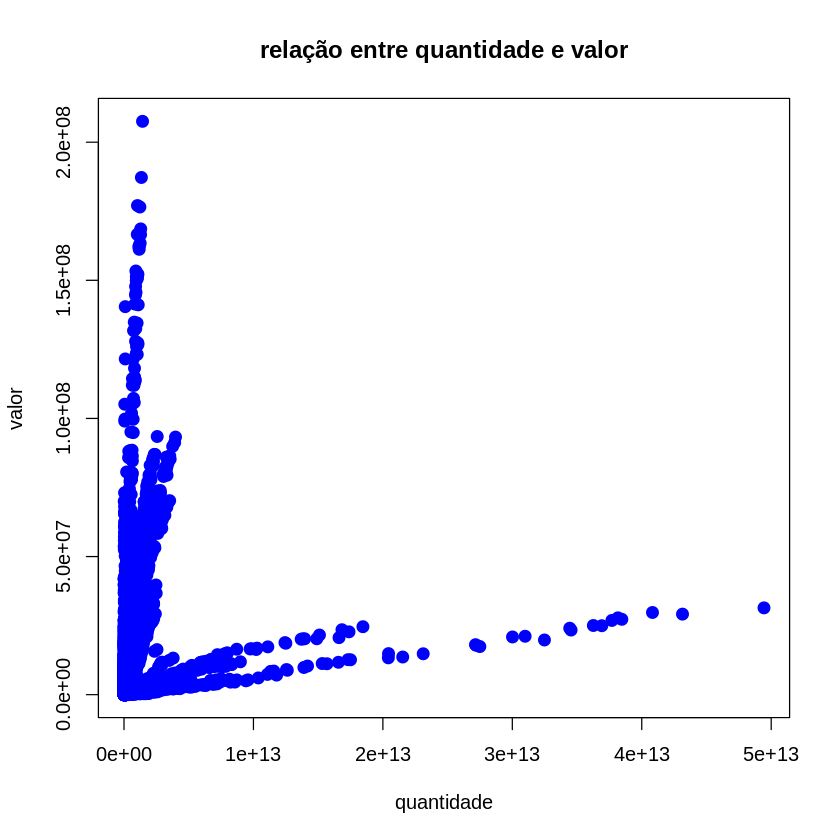

In [ ]:
attach(df)
plot(valor, quantidade,
      main = "relação entre quantidade e valor",
      xlab = "quantidade",ylab="valor",
      pch = 19,
      col = "blue",
      cex = 1.3)

#Índice de correlação

In [ ]:
cor(valor, quantidade)
cor.test(valor, quantidade)

[1] 0.2495385


	Pearson's product-moment correlation

data:  valor and quantidade
t = 190.47, df = 546308, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2470503 0.2520235
sample estimates:
      cor 
0.2495385 


#Tabelas de Determinação

In [ ]:
summary_sal_instru <- tapply(df$quantidade,df$pagidade,summary)
summary_sal_instru

$`[19]`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1       37      522   100478     7689 39911542 

$`[20,29]`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        1       118      2122    531440     35249 177062118 

$`[30,39]`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        1       110      2109    555360     34254 207552841 

$`[40,49]`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        1        83      1530    402590     22922 162865781 

$`[50,59]`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1       47      814   196724    10860 79316934 

$`[60)`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1       29      452    98393     5387 31981290 


In [ ]:
lenght_sal_instru <- tapply(df$quantidade,df$pagidade,length)
lenght_sal_instru

[19] [20,29] [30,39] [40,49] [50,59]    [60) 
  66940   76285   76743   75810   73183   70502

#Gráfico de determinação

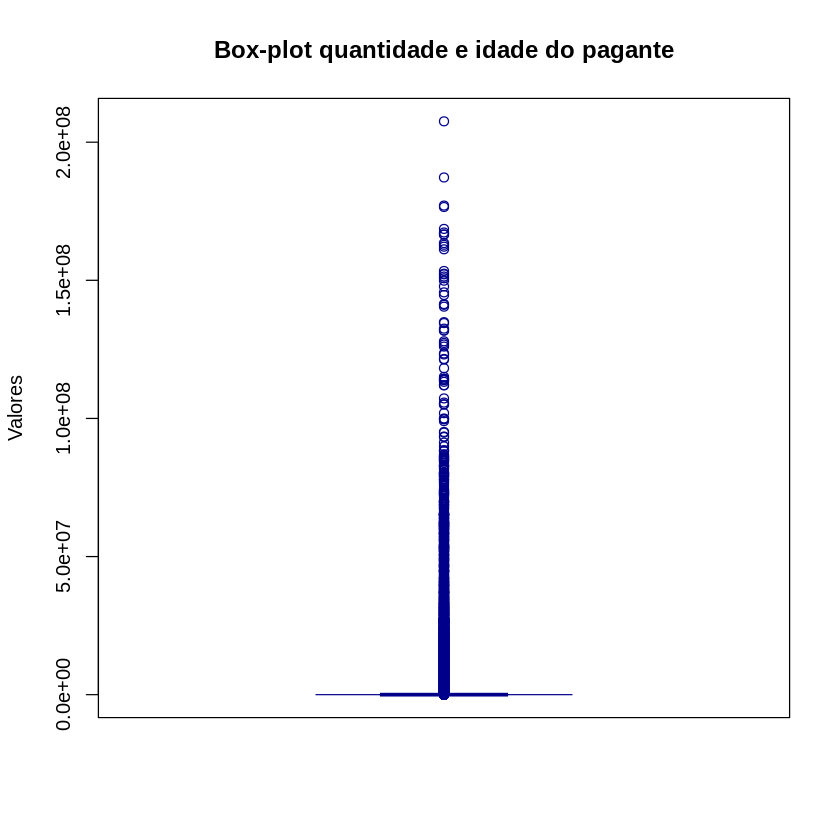

In [ ]:
set.seed(123)
dados <- c(df$quantidade,df$pagidade)
boxplot(dados,
        main="Box-plot quantidade e idade do pagante",
        ylab="Valores",
        col="lightblue",
        border="darkblue",
        notch=T)

#Exemplos:

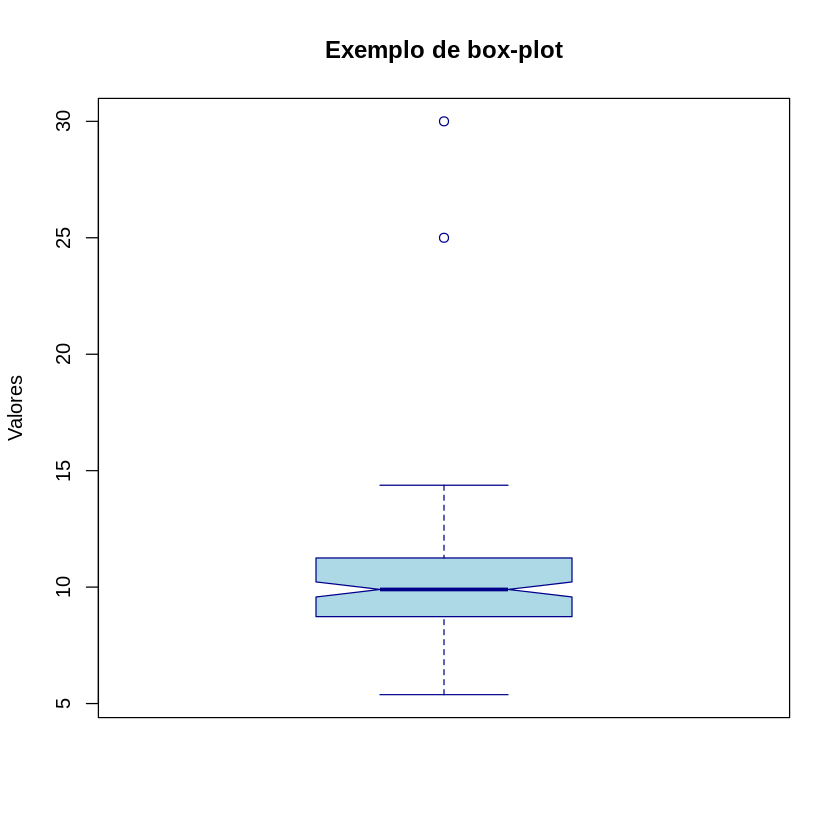

In [ ]:
set.seed(123)
dados <- c(rnorm(150,mean=10,sd=2),25,30)
boxplot(dados,
        main="Exemplo de box-plot",
        ylab="Valores",
        col="lightblue",
        border="darkblue",
        notch=T)

In [ ]:
load(url(description = "https://www.ime.usp.br/~pam/dados.RData"))
kable(head(tab2_1,15),format="latex")


\begin{tabular}{r|l|l|r|r|r|r|l}
\hline
N & estado\_civil & grau\_instrucao & n\_filhos & salario & idade\_anos & idade\_meses & reg\_procedencia\\
\hline
1 & solteiro & ensino fundamental & NA & 4.00 & 26 & 3 & interior\\
\hline
2 & casado & ensino fundamental & 1 & 4.56 & 32 & 10 & capital\\
\hline
3 & casado & ensino fundamental & 2 & 5.25 & 36 & 5 & capital\\
\hline
4 & solteiro & ensino médio & NA & 5.73 & 20 & 10 & outra\\
\hline
5 & solteiro & ensino fundamental & NA & 6.26 & 40 & 7 & outra\\
\hline
6 & casado & ensino fundamental & 0 & 6.66 & 28 & 0 & interior\\
\hline
7 & solteiro & ensino fundamental & NA & 6.86 & 41 & 0 & interior\\
\hline
8 & solteiro & ensino fundamental & NA & 7.39 & 43 & 4 & capital\\
\hline
9 & casado & ensino médio & 1 & 7.59 & 34 & 10 & capital\\
\hline
10 & solteiro & ensino médio & NA & 7.44 & 23 & 6 & outra\\
\hline
11 & casado & ensino médio & 2 & 8.12 & 33 & 6 & interior\\
\hline
12 & solteiro & ensino fundamental & NA & 8.46 & 27 & 11 & capital

In [ ]:
attach(tab2_1)
tab_1 <- table(reg_procedencia,grau_instrucao)
tab_freq_abs <- rbind(cbind(tab_1,margin.table(tab_1,1)),c(margin.table(tab_1,2)),sum(margin.table,tab_1,1))
dimnames(tab_frequ_rel)[1][4]

The following objects are masked from tab2_1 (pos = 12):

    estado_civil, grau_instrucao, idade_anos, idade_meses, N, n_filhos,
    reg_procedencia, salario




ERROR: Error in sum(margin.table, tab_1, 1): invalid 'type' (closure) of argument


responder a pergunta; fazer o box-plot; fazer a tabela de contigência para duas variáveis qualitativas (por coluna tem que pesquisar), fazer o test qui-quadrado

In [ ]:
chisq.test()

In [ ]:
plot(idade_anos, idade_meses,
      main = "relação entre idade e meses",
      xlab = "Idade(anos)",ylab="Idade(meses)",
      pch = 14, #alterar
      col = "blue"
      cex = 1.3)

In [ ]:
cor(idade_anos,idade_meses)
cor.test(idade_anos,idade_meses)

In [ ]:
summary_sal_instru <- tapply(salario,grau_instrucao,summary)
var_sal_instru <- tapply(salario,grau_instrucao,varp)
lenght_sal_instru <- tapply(salario,grau_instrucao,length)

interpretação dos testes